In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#calling the dataset
df=pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#dimensions
df.shape

(418, 12)

In [4]:
#datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#null values
100*df.isna().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [6]:
#checking the balance of the dataset
survival_count=df["Survived"].value_counts()
survival_rate=100*survival_count/df.shape[0]
survival_data=pd.concat([survival_count,survival_rate],axis=1).reset_index()
survival_data.columns=['Survived','Count','Percentage']
survival_data

,Survived,Count,Percentage
0,0,266,63.636364
1,1,152,36.363636


Text(0.5, 1.0, 'Percentage Survival of the Passengers')

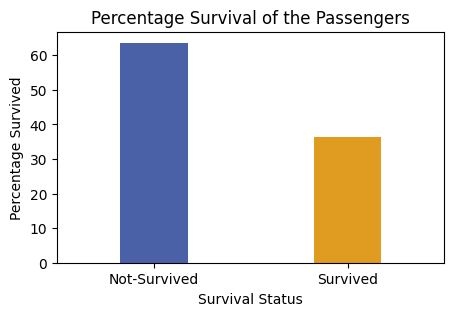

In [7]:
#plot the survival percentage
plt.figure(figsize=(5,3))
custom_colors = ["#3b59b6", "#ffa500"]
status=['Not-Survived','Survived']
sns.barplot(survival_data,x=['Not-Survived','Survived'],y='Percentage',width=0.35,hue=status,palette=custom_colors)
plt.ylabel('Percentage Survived')
plt.xlabel('Survival Status')
plt.title('Percentage Survival of the Passengers')

In [8]:
#function to show survival rate according to groups
def survival_acc_to_group(df,colname):
    plt.figure(figsize=(5,3))
    survival_by_pclass=df[['Survived',colname]].value_counts().reset_index()
    sns.barplot(survival_by_pclass,x=colname,y='count',hue='Survived')
    plt.ylabel('Number of Survival')
    plt.title(f'Survival According to {colname}')

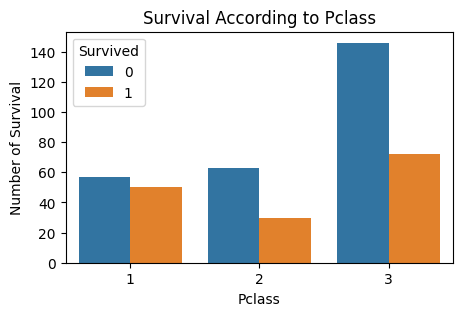

In [9]:
#survival among pclass
survival_acc_to_group(df,'Pclass')

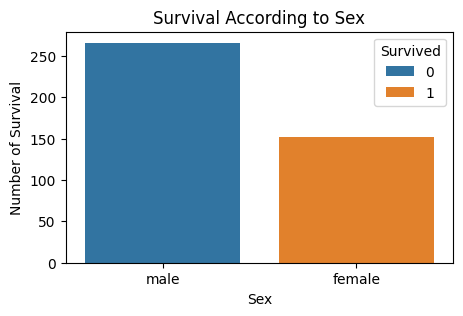

In [10]:
#survival among sex
survival_acc_to_group(df,'Sex')

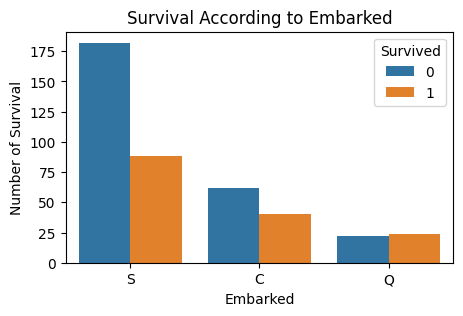

In [11]:
#survival among embarked
survival_acc_to_group(df,'Embarked')

In [12]:
#function to show distribution of variables according to survival
def var_acc_to_survival(df,colname):
    plt.figure(figsize=(5,3))
    sns.kdeplot(df,x=colname,hue='Survived')
    plt.title(f'{colname} distribution according to the survival')

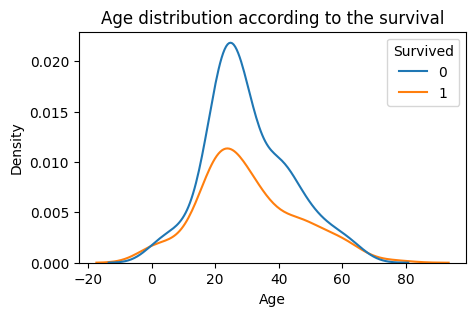

In [13]:
#age distribution according to survival status
var_acc_to_survival(df,'Age')

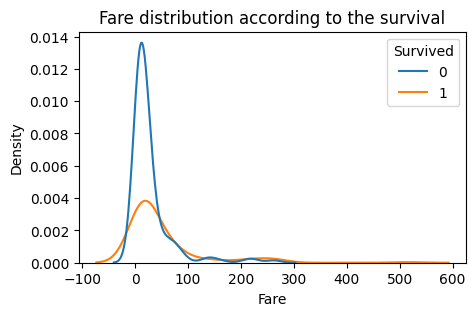

In [14]:
#fare distribution according to survival status
var_acc_to_survival(df,'Fare')

In [15]:
#function to visualise count data according to survival
def count_acc_to_survival(df,colname):
    plt.figure(figsize=(5,3))
    df1=df.groupby(['SibSp','Survived']).count()['PassengerId'].reset_index()
    sns.barplot(df1,x='SibSp',y='PassengerId',hue='Survived')
    plt.title(f'{colname} according to the survival')
    plt.xlabel(f'{colname}')
    plt.ylabel('count')

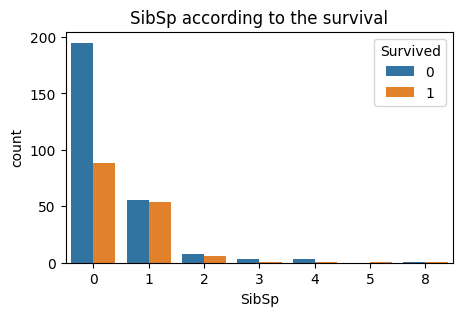

In [16]:
#SipSp distribution according to survival status
count_acc_to_survival(df,'SibSp')

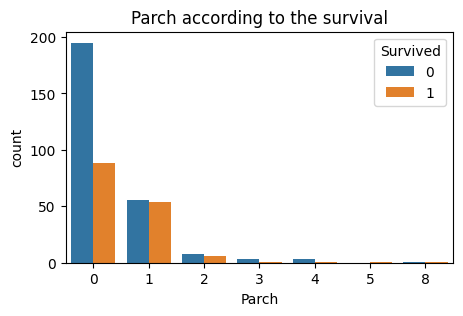

In [17]:
#Parch distribution according to survival status
count_acc_to_survival(df,'Parch')

Text(0.5, 1.0, 'Comparison of the continuous variables')

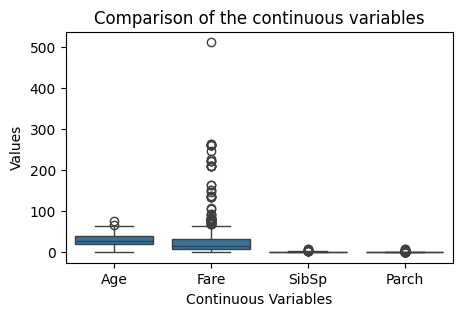

In [18]:
cont_vars=pd.melt(df,value_vars=['Age','Fare','SibSp','Parch'])
plt.figure(figsize=(5,3))
sns.boxplot(cont_vars,x='variable',y='value')
plt.xlabel('Continuous Variables')
plt.ylabel('Values')
plt.title('Comparison of the continuous variables')

In [19]:
#taking out the important features
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [20]:
#deleting rows that has null values in 'Fare' column
df=df.dropna(subset='Fare')

In [21]:
#filling up the missing values of the 'Age' column by the median age
df['Age']=df['Age'].fillna(df['Age'].median())

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
#handling imbalance
df_survived=df[df['Survived']==1]
df_not_survived=df[df['Survived']==0]
df_survived_resampled=df_survived.sample(n=df_not_survived.shape[0],replace=True,random_state=101)
df_balanced=pd.concat([df_not_survived,df_survived_resampled]).sample(frac=1,random_state=26)
df_balanced

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
195,0,3,male,33.0,0,0,7.8542,S
332,0,3,male,27.0,0,0,7.2250,C
219,0,3,male,27.0,0,0,8.0500,S
118,0,1,male,36.0,0,0,75.2417,C
382,1,3,female,27.0,0,0,14.5000,S
...,...,...,...,...,...,...,...,...
259,0,3,male,21.0,0,0,7.7750,S
128,0,2,male,42.0,0,0,13.0000,S
166,0,1,male,48.0,0,0,50.4958,C
309,1,3,female,45.0,1,0,14.1083,S


In [24]:
df_balanced['Survived'].value_counts()

Survived
0    265
1    265
Name: count, dtype: int64

In [25]:
#splitting into x and y
x=df_balanced.drop(['Survived'],axis=1)
y=df_balanced['Survived']

In [26]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1055)
print(f'''
x_train:{x_train.shape}
x_test:{x_test.shape}
y_train:{y_train.shape}
y_test:{y_test.shape}''')


x_train:(424, 7)
x_test:(106, 7)
y_train:(424,)
y_test:(106,)


In [27]:
#preparing the model pipeline
cont_cols=['Age','Fare']
disc_cols=['SibSp','Parch']
cat_cols=['Pclass','Sex','Embarked']
continuous_transformer=Pipeline(steps=[('scaler',StandardScaler())])
discrete_transformer=Pipeline(steps=[('scaler',MinMaxScaler())])
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(drop='first'))])

preprocessor=ColumnTransformer(
    transformers=[
        ('cont',continuous_transformer,cont_cols),
        ('disc',discrete_transformer,disc_cols),
        ('cat',categorical_transformer,cat_cols)])

model=Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression())])
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('disc',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression())])

In [28]:
#prediction
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [29]:
#classification report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        48

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



Text(33.22222222222222, 0.5, 'Predicted Value')

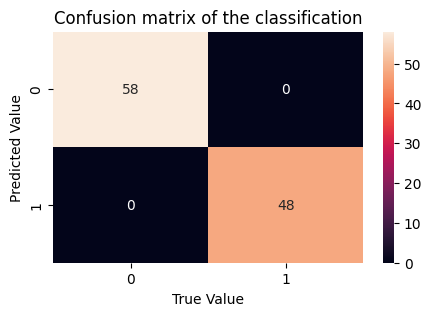

In [89]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.title('Confusion matrix of the classification')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')